                                   DM Assignment1

In [4]:
import os
import xml.etree.ElementTree as ET
import cv2

# Path to the main folders containing images and annotations
directory = os.getcwd()
main_images_folder = 'Images/Images/'
main_annotations_folder = 'Annotations/Annotation/'
output_folder = 'cropped_images'

# Target size 
target_size = (128, 128)

# List of specific folders to process
specific_folders  = ['n02085936-Maltese_dog','n02096294-Australian_terrier','n02106550-Rottweiler','n02092339-Weimaraner']

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Function to check if a file has XML-like content
def is_xml_file(file_path):
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            return '<annotation>' in content and '</annotation>' in content
    except Exception as e:
        return False

# Loop through each specific folder
for folder in specific_folders:
    images_folder = os.path.join(main_images_folder, folder)
    annotations_folder = os.path.join(main_annotations_folder, folder)

    # Loop through each file in the annotations folder
    for filename in os.listdir(annotations_folder):
        file_path = os.path.join(annotations_folder, filename)

        # Check if the file has XML-like content
        if is_xml_file(file_path):
            # Parse XML File
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Find image file corresponding to the annotation
            image_filename = root.find('filename').text
            image_path = os.path.join(directory,images_folder, image_filename)

            image = cv2.imread(image_path+".jpg")

            for obj in root.findall('.//object'):
                bbox = obj.find('bndbox')
                xmin = int(bbox.find('xmin').text)
                ymin = int(bbox.find('ymin').text)
                xmax = int(bbox.find('xmax').text)
                ymax = int(bbox.find('ymax').text)

                roi = image[ymin:ymax, xmin:xmax]

                roi_resized = cv2.resize(roi, target_size)
                req=os.path.join(output_folder,folder)
                os.makedirs(req, exist_ok=True)
               
                output_path = os.path.join(output_folder,folder, f'{image_filename}_resized.jpg')
                #print(output_path)
                cv2.imwrite(output_path, roi_resized)


# (b) Image Processing

In [19]:
import os

img=[]
for folder in os.listdir('cropped_images'):
    path = os.path.join('cropped_images', folder)
    if os.path.isdir(path):
        images = os.listdir(path) 
        crop_images = [image for image in images if image.lower().endswith(('.jpg'))][:2]
        for image in crop_images:
            src_path = os.path.join(path, image)
            img.append(src_path)

In [20]:
img

['cropped_images\\n02085936-Maltese_dog\\n02085936_10073_resized.jpg',
 'cropped_images\\n02085936-Maltese_dog\\n02085936_10130_resized.jpg',
 'cropped_images\\n02092339-Weimaraner\\n02092339_1013_resized.jpg',
 'cropped_images\\n02092339-Weimaraner\\n02092339_107_resized.jpg',
 'cropped_images\\n02096294-Australian_terrier\\n02096294_1111_resized.jpg',
 'cropped_images\\n02096294-Australian_terrier\\n02096294_1121_resized.jpg',
 'cropped_images\\n02106550-Rottweiler\\n02106550_10048_resized.jpg',
 'cropped_images\\n02106550-Rottweiler\\n02106550_10222_resized.jpg']

cropped_images\n02085936-Maltese_dog\n02085936_10073_resized.jpg


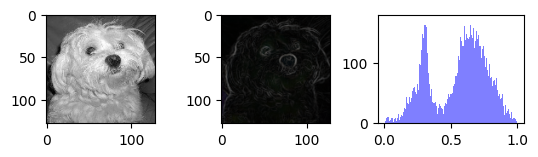

cropped_images\n02085936-Maltese_dog\n02085936_10130_resized.jpg


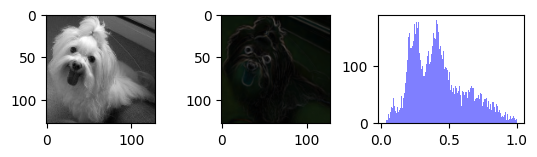

cropped_images\n02092339-Weimaraner\n02092339_1013_resized.jpg


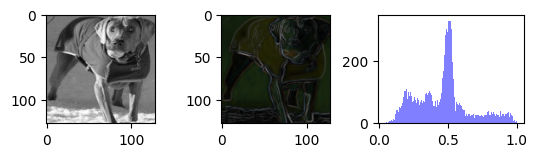

cropped_images\n02092339-Weimaraner\n02092339_107_resized.jpg


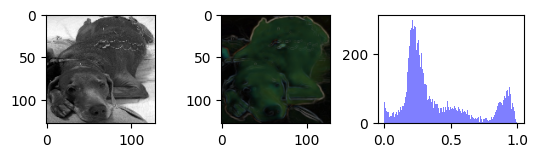

cropped_images\n02096294-Australian_terrier\n02096294_1111_resized.jpg


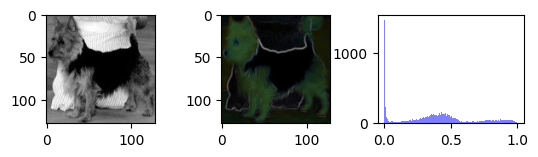

cropped_images\n02096294-Australian_terrier\n02096294_1121_resized.jpg


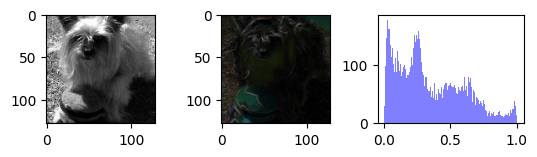

cropped_images\n02106550-Rottweiler\n02106550_10048_resized.jpg


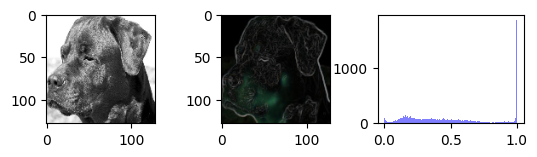

cropped_images\n02106550-Rottweiler\n02106550_10222_resized.jpg


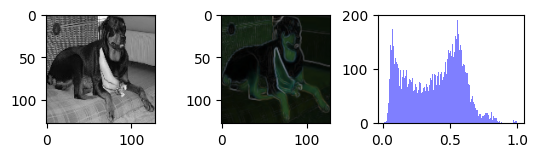

In [21]:
from skimage import filters
from skimage.color import rgb2gray
import cv2
import matplotlib.pyplot as plt
for image in img:
    img = cv2.imread(image)
    grey_img = rgb2gray(img)
    sobel_img = filters.sobel(img)           
    #plot_grey(image,grey_img)  
    #plot_equa(image,equalized_img)
    print(image)
    plt.subplot(331), plt.imshow(grey_img, cmap='gray')
    plt.subplot(333),plt.hist(grey_img.ravel(), bins=256, color='b', alpha=0.5)
    plt.subplot(332), plt.imshow(sobel_img, cmap='gray')
    
    plt.show()
    

# (c) Edge histogram

n02085936_10073_resized.jpg


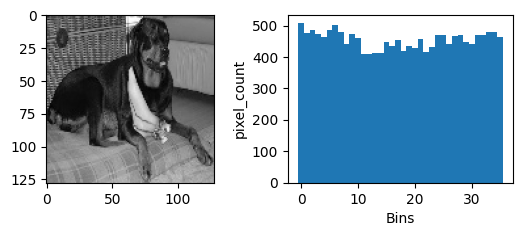

n02092339_1013_resized.jpg


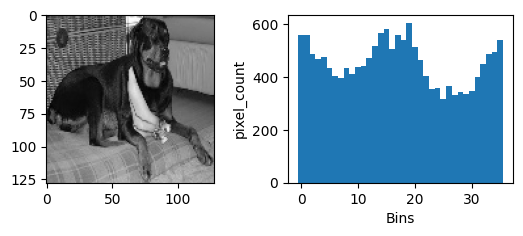

n02096294_1111_resized.jpg


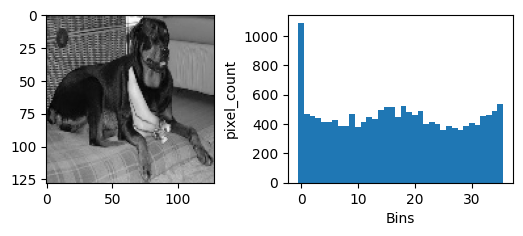

n02106550_10048_resized.jpg


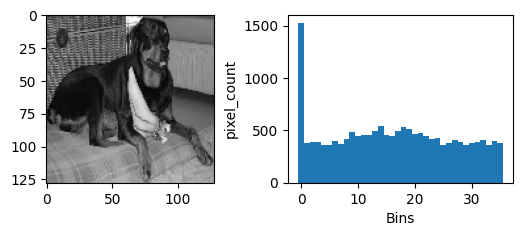

In [24]:
import numpy as np
from skimage import filters
from skimage import data, exposure, img_as_float

def angle(dx, dy):
 """Calculate the angles between horizontal and vertical operators."""
 return np.mod(np.arctan2(dy, dx), np.pi)
for folder in os.listdir('cropped_images'):
    path = os.path.join('cropped_images', folder)
    if os.path.isdir(path):
        images = os.listdir(path) 
        crop_images = [image for image in images if image.lower().endswith(('.jpg'))][:1]
        for image in crop_images:
            src_path = os.path.join(path, image)
            img = cv2.imread(src_path)
            gray_img = rgb2gray(img)
            angle_sobel = angle(filters.sobel_h(gray_img),filters.sobel_v(gray_img))
            hist,_=exposure.histogram(angle_sobel, nbins=36)
            print(image)
            plt.subplot(221), plt.imshow(grey_img, cmap='gray')
            plt.subplot(222),plt.bar(np.arange(len(hist)), hist, width=1),plt.xlabel('Bins'),plt.ylabel('pixel_count')
            plt.show()

#  (d) HistogramComparison(MeasuresofSimilarityandDissimilarity)

In [25]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

image=['cropped_images\\n02085936-Maltese_dog\\n02085936_10073_resized.jpg',
 'cropped_images\\n02085936-Maltese_dog\\n02085936_10130_resized.jpg',
 'cropped_images\\n02092339-Weimaraner\\n02092339_1013_resized.jpg']
his=[]
for img in image:
    img = cv2.imread(img)
    gray_img = rgb2gray(img)
    angle_sobel = angle(filters.sobel_h(gray_img),filters.sobel_v(gray_img))
    hist,_=exposure.histogram(angle_sobel, nbins=36)
    his.append(hist)

def comparision(hist1,hist2):
    print("Manhattan Distance: {}".format(manhattan_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0]))
    print("Euclidean Distance: {}".format(euclidean_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0]))
    print("cosine Distance: {}".format(cosine_distances(hist1.reshape(1, -1), hist2.reshape(1, -1))[0][0]))



In [26]:
comparision(his[0],his[1])#same

Manhattan Distance: 2384.0
Euclidean Distance: 489.10121651862613
cosine Distance: 0.015721692964292044


In [27]:
comparision(his[1],his[2])#different

Manhattan Distance: 3998.0
Euclidean Distance: 783.6593647752829
cosine Distance: 0.040012096328483016


#  (e) Histogram of Oriented Gradient (HOG) feature descriptor 

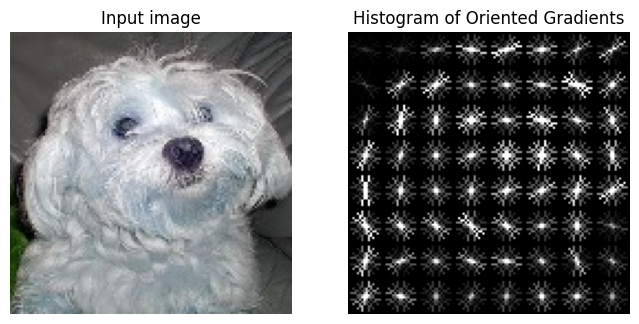

In [28]:
from skimage.feature import hog

path='cropped_images\\n02085936-Maltese_dog\\n02085936_10073_resized.jpg'
image = cv2.imread(path)


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

#  (f) Dimensionalityreduction(usingPrincipalComponentAnalysis,PCA)

In [61]:
from sklearn.decomposition import PCA
pca_hist=[]
label=[]
class_labels = {'n02106550-Rottweiler':0,'n02092339-Weimaraner':1}

for folder in ['n02106550-Rottweiler','n02092339-Weimaraner']:
    path = os.path.join('cropped_images', folder)
    if os.path.isdir(path):
        images = os.listdir(path) 
        crop_images = [image for image in images if image.lower().endswith(('.jpg','.jpeg', '.png'))]
        for image in crop_images:
            src_path = os.path.join(path, image)
            img = cv2.imread(src_path)
            gray_img = rgb2gray(img)
            angle_sobel = angle(filters.sobel_h(gray_img),filters.sobel_v(gray_img))
            hist,_=exposure.histogram(angle_sobel, nbins=36)
            pca_hist.append(hist)
            label.append(class_labels[folder])

Text(0, 0.5, 'Principal Component')

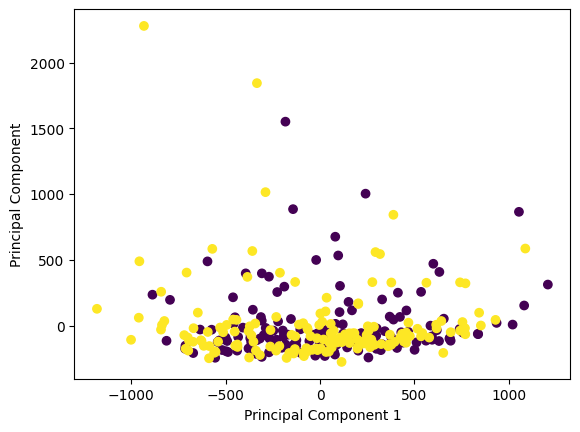

In [62]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(pca_hist)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component')

Data points intersect at the mid region the data is not separable.